In [115]:
import random
import string
from datetime import datetime
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

dataset_url = 'dataset/bank.csv'
df_full = pd.read_csv(dataset_url)
target = 'deposit'
numerical_features = ['age', 'balance']
binary_features=['default', 'housing', 'loan']
categorial_features=['job', 'marital', 'education']

oh_encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoded_data = oh_encoder.fit_transform(df_full[categorial_features])
encoded_columns = oh_encoder.get_feature_names_out(categorial_features)
X = pd.DataFrame(encoded_data, columns=encoded_columns)

l_encoder = LabelEncoder()
for feature in binary_features:
    X[feature] = l_encoder.fit_transform(df_full[feature])
X[numerical_features] = StandardScaler().fit_transform(df_full[numerical_features])

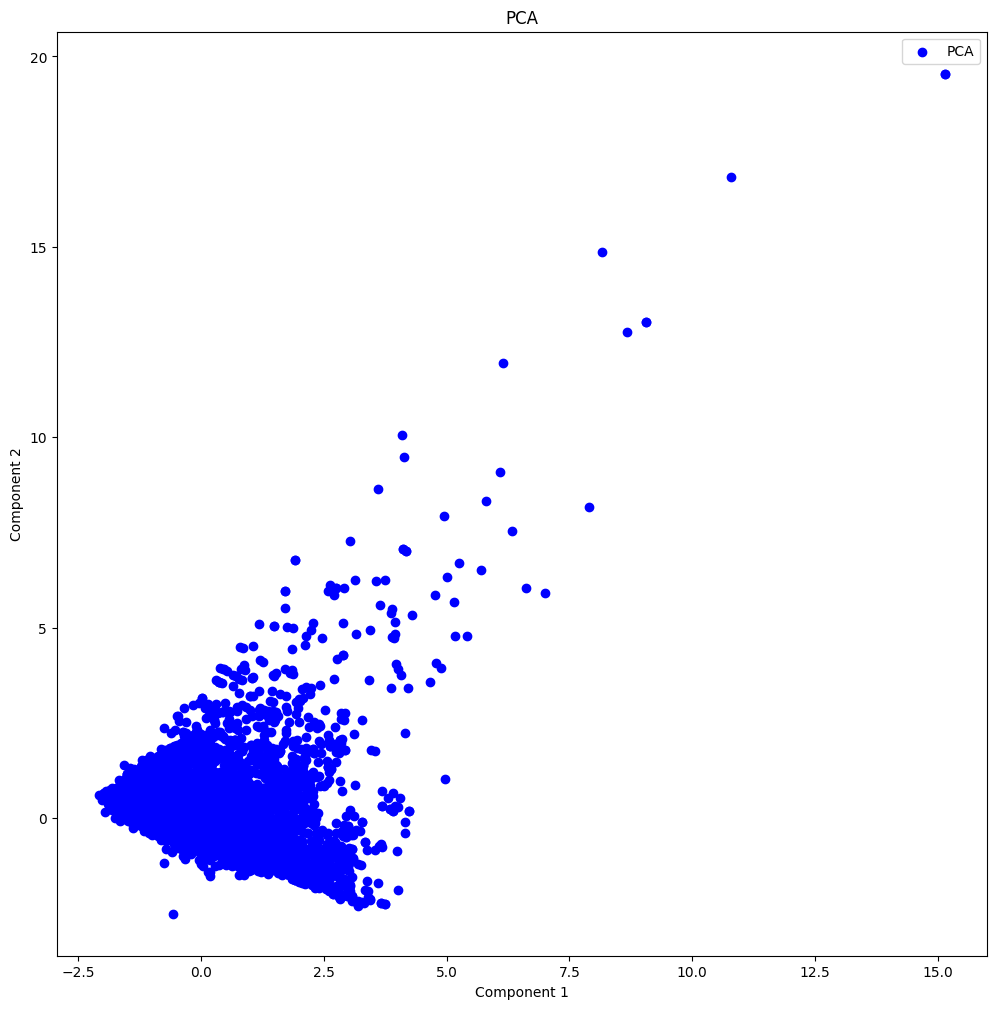

Explained Variance by PCA components: [0.27352884 0.21405478]


In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(12, 12))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', label='PCA')
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by PCA components: {explained_variance}')

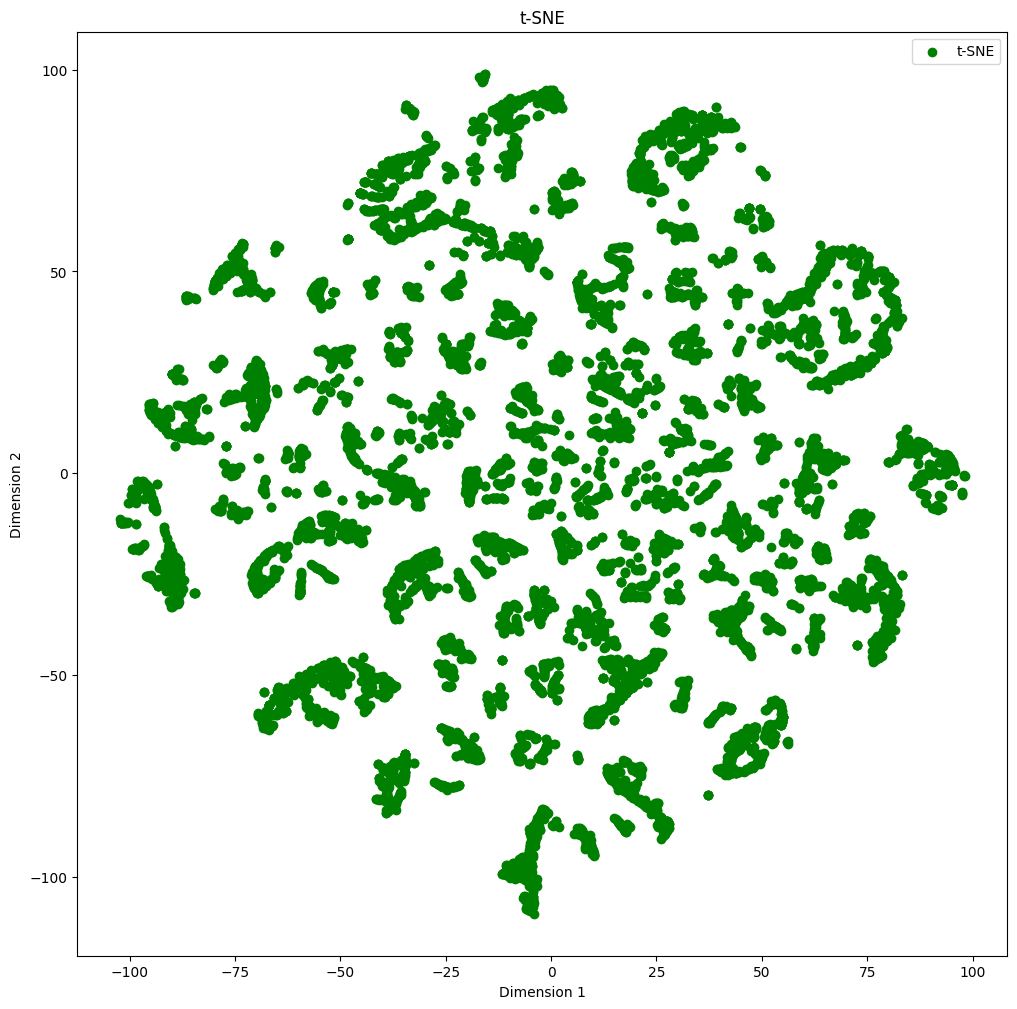

In [8]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

plt.figure(figsize=(12, 12))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='green', label='t-SNE')
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

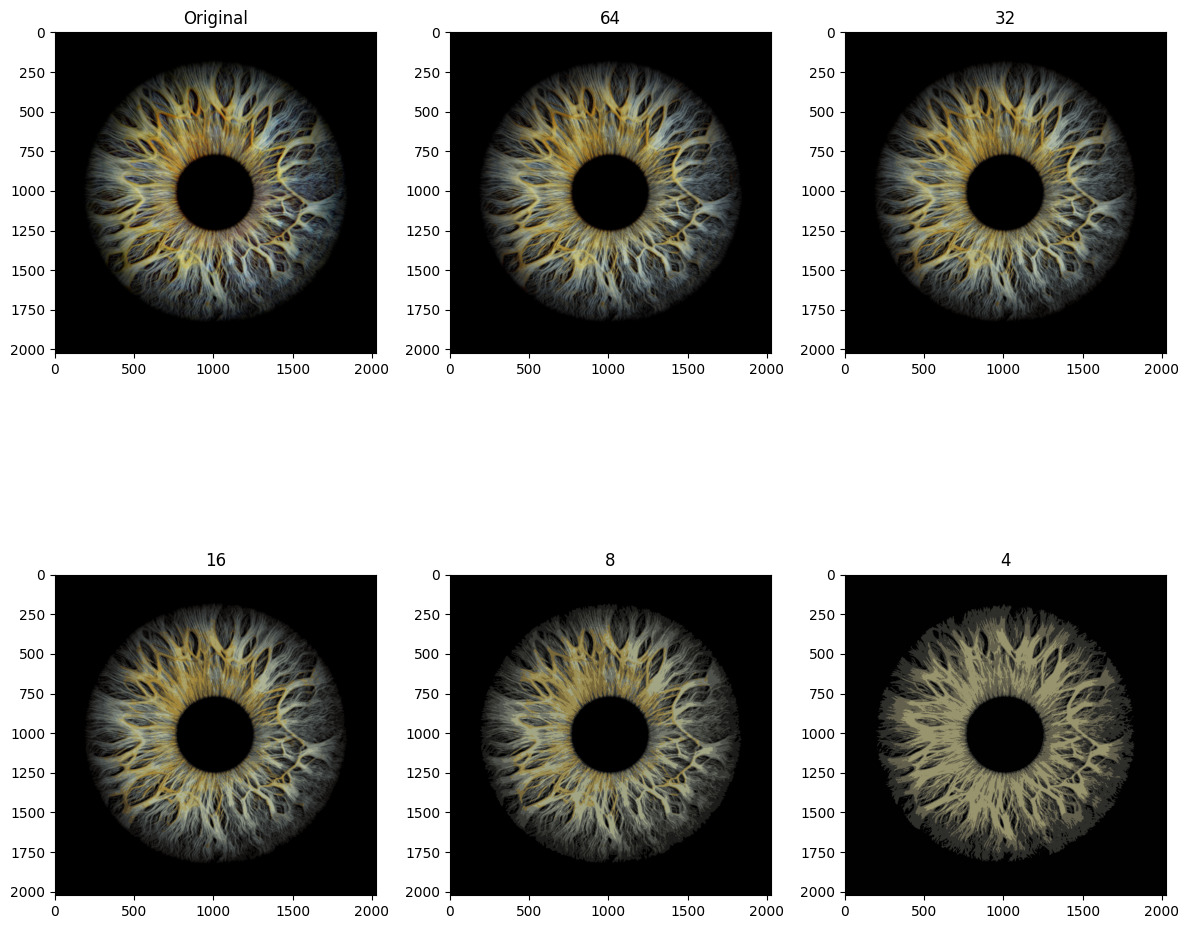

In [37]:
import numpy
import skimage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

image_path = "dataset/photo.jpg"
image = skimage.io.imread(image_path)

def quantize_image(n_colors):
    image_array = numpy.array(image)
    pixels = image_array.reshape(-1, 3)

    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(pixels)
    
    quantized_pixels = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')
    quantized_image = quantized_pixels.reshape(image_array.shape)
    
    return quantized_image

fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes[0, 0].imshow(image)
axes[0, 0].set_title('Original')

axes[0, 1].imshow(quantize_image(64))
axes[0, 1].set_title('64')

axes[0, 2].imshow(quantize_image(32))
axes[0, 2].set_title('32')

axes[1, 0].imshow(quantize_image(16))
axes[1, 0].set_title('16')

axes[1, 1].imshow(quantize_image(8))
axes[1, 1].set_title('8')

axes[1, 2].imshow(quantize_image(4))
axes[1, 2].set_title('4')

plt.tight_layout()
plt.show()

label
1    4314
0    3803
Name: count, dtype: int64


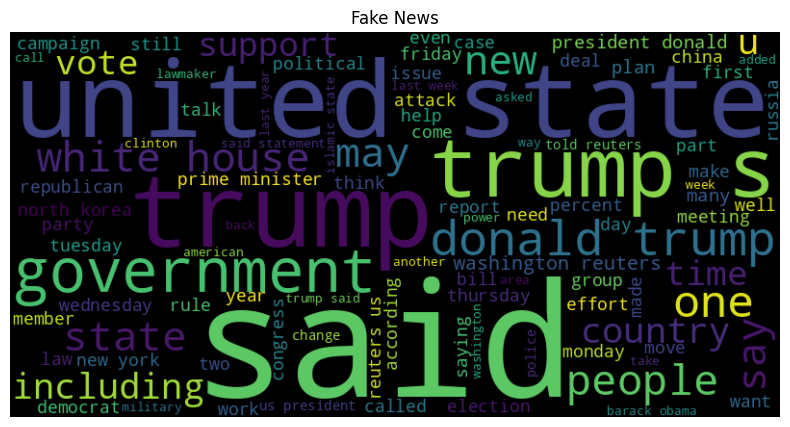

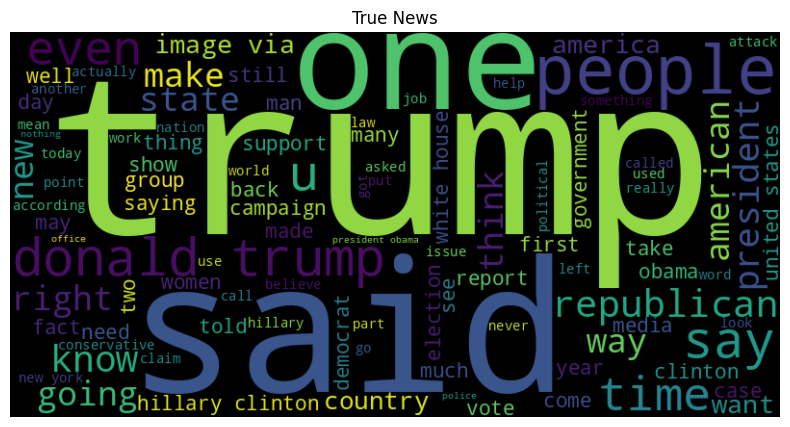

In [125]:
# https://www.kaggle.com/datasets/srisaisuhassanisetty/fake-job-postings
# https://www.kaggle.com/datasets/aadyasingh55/fake-news-classification

df_full = pd.read_csv('dataset/evaluation.csv', sep=';')
print(df_full['label'].value_counts())

# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def plot_wordcloud(data, title):
    wc = WordCloud(width=800, height=400, max_words=100).generate(' '.join(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

df_full['title'] = df_full['title'].apply(preprocess_text)
df_full['text'] = df_full['text'].apply(preprocess_text)
plot_wordcloud(df_full[df_full['label'] == 1]['text'], 'Fake News')
plot_wordcloud(df_full[df_full['label'] == 0]['text'], 'True News')

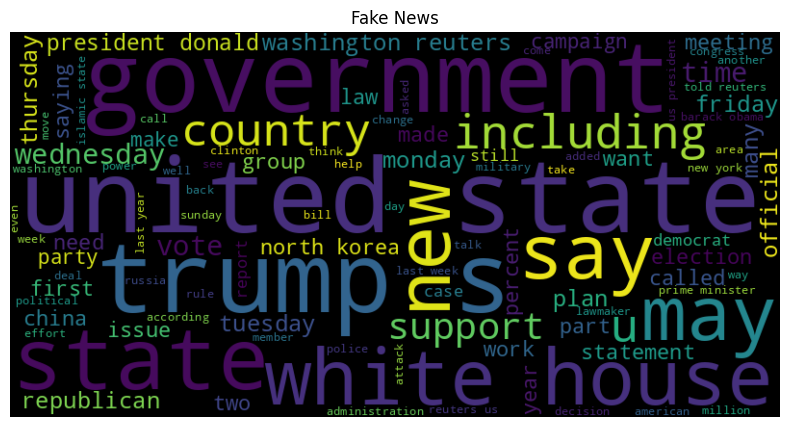

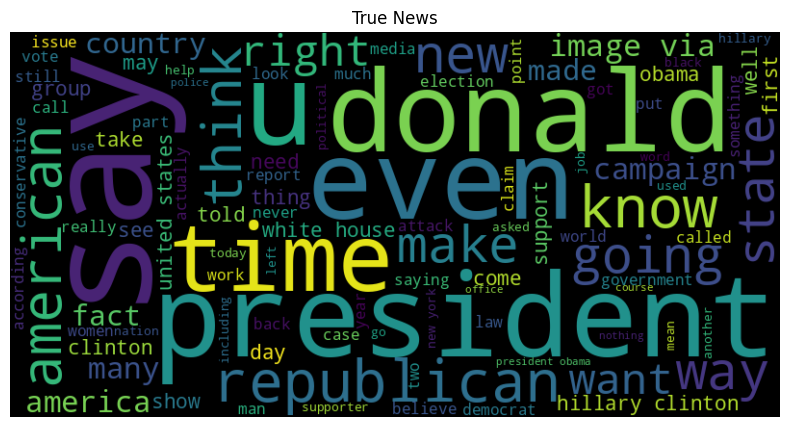

In [126]:
stop_words |= {'trump', 'said', 'people', 'one'}
df_full['text'] = df_full['text'].apply(preprocess_text)
plot_wordcloud(df_full[df_full['label'] == 1]['text'], 'Fake News')
plot_wordcloud(df_full[df_full['label'] == 0]['text'], 'True News')

In [127]:
random.seed(datetime.now().timestamp())
train_df, test_df = train_test_split(df_full, test_size=0.3, random_state=random.randint(0, 100))

tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['text'])
X_test = tfidf.fit_transform(test_df['text'])
y_train = train_df['label']
y_test = test_df['label']

In [128]:
naive_bayes = MultinomialNB().fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.5184729064039408
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53      1172
           1       0.54      0.48      0.51      1264

    accuracy                           0.52      2436
   macro avg       0.52      0.52      0.52      2436
weighted avg       0.52      0.52      0.52      2436

Confusion Matrix:
 [[662 510]
 [663 601]]


In [129]:
regression = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = regression.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.5024630541871922
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.84      0.62      1172
           1       0.56      0.19      0.28      1264

    accuracy                           0.50      2436
   macro avg       0.53      0.51      0.45      2436
weighted avg       0.53      0.50      0.44      2436

Confusion Matrix:
 [[ 985  187]
 [1025  239]]


In [130]:
foreset = RandomForestClassifier().fit(X_train, y_train)
y_pred = foreset.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.4942528735632184
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.92      0.64      1172
           1       0.57      0.10      0.17      1264

    accuracy                           0.49      2436
   macro avg       0.53      0.51      0.40      2436
weighted avg       0.53      0.49      0.40      2436

Confusion Matrix:
 [[1075   97]
 [1135  129]]
